# Objectives
- Describe a driving path using a belzier
    - I need to be able to randomly generate belzier curves
    - I can use the nature of belzier curves being envelopes of non-discrete lines to my advantedge. 
    - Instead of getting the envelope, I can work backwards to just take the distance formula at each point
- Interpolate the equation of that belzier
- Export the interpolated lines into a graph
- Turn the lines into relative movement instruction
- Translate the relative movement instruction into code


## Generating Test cases
Implemented the below formula to generate random length bezier curves
<img src="belzier_formula.jpg" />

In [303]:
import scipy
import random
import math
# Make a list with length n, with random points in the range [0,10]
import numpy as np
import matplotlib.pyplot as plt
size = random.randint(5, 10)
pointList = np.random.rand(size,2)*80
# t goes up to 1
interp = .01
def belzierPoint(pointList,t):
    x_i = 0
    y_i = 0
    n = len(pointList)
    # So then loop through the interpolate t from 0 to 1 by .1
    for i, point in enumerate(pointList):
        x_i += scipy.special.binom(n,i)*((1-t)**(n-i))*t**i*point[0]
        y_i += scipy.special.binom(n,i)*((1-t)**(n-i))*t**i*point[1]
    return x_i,y_i
# bexierPoint calculates the values in the curve at a certain point
def belzier(pointList, t = None):
    x,y = [],[]
    if t == None:
        for t in np.arange(0, 1+interp, interp):
            x_i,y_i = belzierPoint(pointList,t)
            x.append(x_i)
            y.append(y_i)
# belzier constructs the whole curve

    return x,y
x,y = belzier(pointList)

## Generating line interpolation
The density of "t" is directly proportional to the amount of changes in the curve's area, so that can be used to implicitly apply the secant lines

In [304]:
linePoints =[]
lines = []
numLines = 5
lineInterp = 1/numLines
driveInstruction= []

import math
for i in np.arange(0, 1+lineInterp, lineInterp):
    # "i" is not an integer, it seems to be a sliced float, thus I need to remap it across the length to get the objective point
    x_i,y_i = belzierPoint(pointList,i)
    # this calculation is not neccecarily efficient, but as the belzier mapping ignores the driving variable t, I do not want to change it. 
    # Additionally, the value at t that I want might not have been calculated in my step size, and going to the nearest value is annoying
    linePoints.append([x_i,y_i])
vectors = []
# This below loop just takes the points as an input, and spits out the vectors
for i in range(len(linePoints)):
    if(i!=0):
        
        deltaX= linePoints[i][0]-linePoints[i-1][0]
        deltaY = linePoints[i][1]-linePoints[i-1][1]

        # the magnitude of these guys, and then the inverse tangent of them
        # POLAR VECTOR COORDINATES NOW, EASIER
        magnitude = (deltaX**2+deltaY**2)**.5
        angle = (math.atan2(deltaY,deltaX))
        # Usage of the atan2 function is key here, as it automaps the range to [-pi,pi] for corrent outputs, atan would cause sporadic flipping of values
        vectors.append([magnitude,angle])
# driveInstruction.append([,angle])

# Calculation Reversal for Graph Checking


In [305]:
projectedPoints = [linePoints[0]]

for i in range(len(vectors)):
    # print("\n",projectedPoints)
    # print("\n",linePoints)
    deltaX= vectors[i][0]*math.cos((vectors[i][1]))
    deltaY = vectors[i][0]*math.sin((vectors[i][1]))

    projectedX=projectedPoints[i][0]+deltaX
    projectedY = projectedPoints[i][1]+deltaY
    # print(i,projectedPoints[i])
    projectedPoints.append([projectedX,projectedY])
print("\n",projectedPoints)
print("\n",linePoints)



 [[46.360111484480704, 14.411819381812014], [46.666571607235134, 23.584393796971533], [36.44686058153578, 14.688546155971716], [29.340990833177507, 13.804794995143252], [27.40003582825313, 15.600112853826166], [0.0, -8.881784197001252e-15]]

 [[46.360111484480704, 14.411819381812014], [46.666571607235134, 23.584393796971533], [36.44686058153578, 14.688546155971718], [29.340990833177507, 13.804794995143254], [27.40003582825313, 15.600112853826168], [0.0, 0.0]]


## Similar Slope Merging
Some curves may still end up with two nearly continuous secant lines, so this code merges them if the angle is within 75%.
This uses recursion 

In [306]:
def reduce():
    for i in range(len(lines)):
        if(i!=0 and i<len(lines)-1):
            slope1 = (lines[i-1][0][1]-lines[i-1][1][1])/(lines[i-1][0][0]-lines[i-1][1][0])
            slope2 = (lines[i][0][1]-lines[i][1][1])/(lines[i][0][0]-lines[i][1][0])
            avg = ((slope1+slope2)/2)
            percent_diff=abs(slope1-slope2)/avg
            if(abs(percent_diff)<.75):
                lines[i-1]=[lines[i-1][0],lines[i][1]]
                lines.pop(i)
                linePoints.pop(i)
                reduce()
            length = math.sqrt((lines[i][0][1]-lines[i][1][1])**2+(lines[i][1][0]-lines[i][0][0])**2)
            if length < 1:
                print(length)
                lines[i-1]=[lines[i-1][0],lines[i][1]]
                lines.pop(i)
                linePoints.pop(i)
                reduce()
reduce()

## Making motion instructions
Compiling all the data into step by step instructions

The motion information consists of step rotation, step length, and rotation type


## Graphing
Taking all the data currently calculated, and making it viewable

### Checking driving Instructions
- This code takes the parsed driving instructions and plots them ontop the curve. This was to double check that the conversion was done properly
- Additionally the code dumps the rotation-types points into lists so they can be individually plotted

In [307]:
import math
extraPoints = []
omniPoints = []
rotationPoints=[]
for i in range(len(driveInstruction)):
    if i!=0:
        t1 = angl
        
        angl = math.radians(driveInstruction[i][1])
        position[0]+=driveInstruction[i][0]*math.cos(angl)
        position[1]+=driveInstruction[i][0]*math.sin(angl)
        extraPoints.append([position[0],position[1]])
        if driveInstruction[i][2]=='R':
            rotationPoints.append([position[0],position[1]])
        else:
            omniPoints.append([position[0],position[1]])
    else:
        position = [linePoints[0][0],linePoints[0][1]]
        extraPoints.append(driveInstruction[0][0])
        angl = math.radians(driveInstruction[0][1])

# Theres a omni turn, and a rotation turn

### Plotting
The below code takes all the calculated data and puts it onto a colorcoded map for readability. This plot represents the analogue for what the GUI will eventually look like

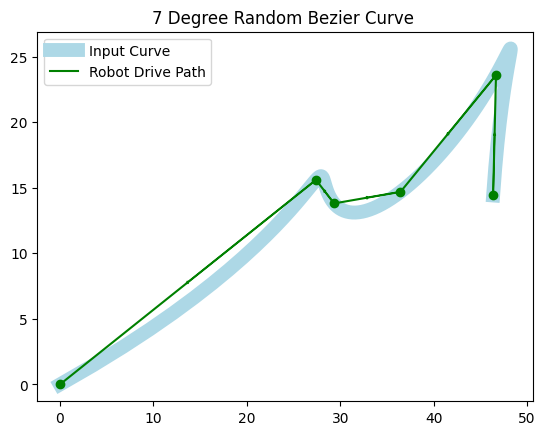

In [308]:
from matplotlib.widgets import Slider, Button, RadioButtons
plt.plot(x,y,label='Input Curve',linewidth=10,color= 'lightblue',zorder=1)

plt.title(str(size)+' Degree Random Bezier Curve ') 


x_l,y_l = zip(*projectedPoints)
ax = plt.gca()
plt.scatter(x_l,y_l,color = 'g',zorder=2)
plt.plot(x_l,y_l,color = 'g',label = 'Robot Drive Path',zorder=2)


# Creating direction arrows
for i in range(len(linePoints)):
    if i<len(linePoints)-1:
        plt.arrow(x_l[i],y_l[i],(x_l[i+1]-x_l[i])/2,(y_l[i+1]-y_l[i])/2,head_width=0.2,head_length=0.2,color='g',zorder=3)
if len(rotationPoints)>0:
    x_rotation,y_rotation = zip(*rotationPoints)
    plt.scatter(x_rotation,y_rotation,color= 'r',label = 'Rotation Points',zorder = 3)

if(len(omniPoints)>0):
    x_omni,y_omni = zip(*omniPoints)
    plt.scatter(x_omni,y_omni,color= 'b',label = 'Omni Points',zorder = 3)

plt.legend()
plt.savefig('Driving Path.png',dpi = 100,facecolor='w', edgecolor='w',orientation='landscape',transparent=False, bbox_inches='tight', pad_inches=0.1)


## Translating movement into Java
- Write the driveInstruct list into a basic textfile
- Later get that into java


In [309]:
line = "A.EndDrive(10,0,0,dPower,0)"
def encDrive(d,speed,time,tab):
    tab_string = '\t'*tab
    command =  f"r.AEncDrive({d},0,{speed},0,{time});"
    return tab_string +command
def encTurn(r,speed,time,tab):
    tab_string = '\t'*tab
    command = f"r.gyroTurnAbsolute({r},{speed},{time});"
    telemetry = f"\n{tab_string}telemetry.addData(\"heading:\",r.imu.getHeading());"+tab_string+f"\n{tab_string}telemetry.update();"
    telemetry += f"\n{tab_string}telemetry.addData(\"turn:\",{r}-r.imu.getHeading());"
    return tab_string + command+telemetry
tab = 2



In [310]:
def instructionWrite(tab):
    
    for i,instruction in enumerate(driveInstruction):
        print(instruction)
        if i==0:
            secondfile.write(f'\n\t\t// X{instruction[0][0]} Y{instruction[0][1]} R{instruction[1]}-{instruction[2]}\n')
            # secondfile.write(encTurn(instruction[1],.5,4000,tab)+'\n')
        else:
            # f.write(f'\nD{instruction[0]} R{instruction[1]}-{instruction[2]}')
            secondfile.write('\n'+encTurn(instruction[1],.2,4000,tab)+'\n')
            secondfile.write( encDrive(instruction[0],.5,4000,tab)+"\n")
    secondfile.write(f'\t}} \n}}') 

In [311]:
print(driveInstruction)

[]


In [312]:
# Copy text from basic code.txt to a new file, 
# open both files
dir = 'C:\\Users\\amer_\\OneDrive - Greenhill School\\Documents\\GitHub\\ViridianRobotController\\TeamCode\\src\\main\\java\\org\\firstinspires\\ftc\\teamcode\\Autons\\'
with open('basicCode.txt','r') as firstfile, open(dir+'PathDriver.java','w') as secondfile:
      
    # read content from first file
    for line in firstfile:
               
             # write content to second file
             secondfile.write(line)
    instructionWrite(tab)